<a href="https://colab.research.google.com/github/alexkardan/ABS-Visualizations/blob/main/ABS_Actual_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import glm
import statsmodels.formula.api as smf

In [ ]:
#3 datasets that contain the top 500 selling alcohol items
#The volume store is dependent on revenue
#high volume store is revenue > 8 million, medium between 6-8 million, and low less then 6 million
High_volume_store = pd.read_csv('Montgomery College Data Set(High Volume).csv')
Medium_volume_store = pd.read_csv('Montgomery College Data Set(Medium Volume).csv')
Low_volume_store = pd.read_csv('Montgomery College Data Set(Low Volume).csv')

In [ ]:
High_volume_store.head()

,ItemID,Description,Bottles Per Case,Cost Amount (Per Bottle),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Full Year
0,18467,SCOTTY'S VODKA 50ML,96,0.990000,377,433,460,465,582,536,728,869,1021,856,692,558,7577
1,96741,CORONA EXTRA 4/6 NR - 12OZ,24,1.831667,408,546,360,534,684,624,696,618,726,684,912,708,7500
2,70417,FIREBALL CINN WHISKY 50ML/10PK LOOSE,120,1.090000,547,730,615,796,960,697,567,620,534,615,350,321,7352
3,249230,FIREBALL WHISKY 10PK SLV - 50ML,120,1.090000,820,630,590,410,270,730,740,580,680,580,820,440,7290
4,35211,SMIRNOFF VODKA - 50ML,120,0.990000,714,857,855,811,221,409,659,299,514,596,636,685,7256


In [ ]:
High_volume_store.describe()

,ItemID,Bottles Per Case,Cost Amount (Per Bottle),Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Full Year
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,85910.848000,34.6960,10.092725,70.900000,79.010000,83.694000,85.438000,100.638000,101.430000,99.778000,99.936000,92.456000,100.020000,105.634000,110.072000,1129.006000
std,86109.652048,36.8061,13.193010,87.305776,93.359294,94.837338,99.478148,112.019157,127.375532,129.511247,122.078591,118.882472,125.416898,131.473079,134.758876,1212.841853
min,1880.000000,6.0000,0.732667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,356.000000
25%,30963.750000,12.0000,1.831667,26.750000,31.000000,35.000000,33.000000,42.000000,36.000000,32.000000,36.000000,33.000000,36.000000,38.000000,41.000000,480.000000
50%,61887.000000,24.0000,2.990000,47.000000,50.000000,54.000000,55.000000,64.500000,56.500000,55.000000,60.000000,52.000000,56.500000,61.500000,71.000000,694.000000
75%,88589.250000,24.0000,13.990000,77.000000,87.250000,92.000000,96.000000,114.000000,104.000000,108.000000,107.250000,96.000000,100.250000,115.000000,116.000000,1169.000000
max,431575.000000,126.0000,73.990000,820.000000,857.000000,855.000000,811.000000,960.000000,888.000000,924.000000,972.000000,1021.000000,856.000000,912.000000,930.000000,7577.000000


In [ ]:
High_volume_store.columns

Index(['ItemID', 'Description', 'Bottles Per Case', 'Cost Amount (Per Bottle)',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Full Year'],
      dtype='object')

In [ ]:
#melt a dataframe into several columns
melted_df = High_volume_store.melt(
    id_vars=['ItemID', 'Description', 'Bottles Per Case', 'Cost Amount (Per Bottle)'],
    var_name='Month',
    value_name='Sales'
)

In [ ]:
#map all of the months into seasons
season_mapping = {
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall'
}


In [ ]:
#mapping the seasons into months
melted_df['Season'] = melted_df['Month'].map(season_mapping)


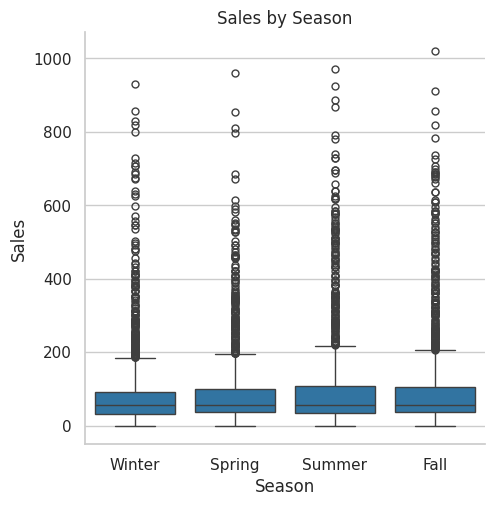

In [ ]:
#boxplot of seasons and there sales for the high volume store
sns.catplot(x = "Season", y = "Sales", data = melted_df, kind = "box", errorbar = None)
plt.title("Sales by Season")
plt.show()

In [ ]:
#boxplot with the px function adding the "plotly_dark" template
fig = px.box(melted_df,
             x = "Season",
             y = "Sales",
             color = "Season",
             template = "plotly_dark",
             title = "Sales by Season"
             )
fig.show()

In [ ]:
#using if, elif and else functions to categorize the items into different alcohol items
def categorize_items(Description):

  if 'WHISKEY' in Description :
    return 'Whiskey'
  elif 'BEER' in Description:
    return 'Beer'
  elif 'WINE' in Description:
    return 'Wine'
  elif 'VODKA' in Description:
    return 'Vodka'
  elif 'TEQUILA' in Description:
    return 'Tequila'
  elif 'CORONA':
    return 'Corona'
  else:
    return 'Other'

In [ ]:
# Applied the categorize_items function to the 'Description' column and store the result in a new 'Category' column
High_volume_store['Category'] = High_volume_store['Description'].apply(categorize_items)

In [ ]:
High_volume_store_sorted = High_volume_store.sort_values(by = "Cost Amount (Per Bottle)", ascending = False)
High_volume_store_mean = High_volume_store.groupby("Category")["Cost Amount (Per Bottle)"].mean()

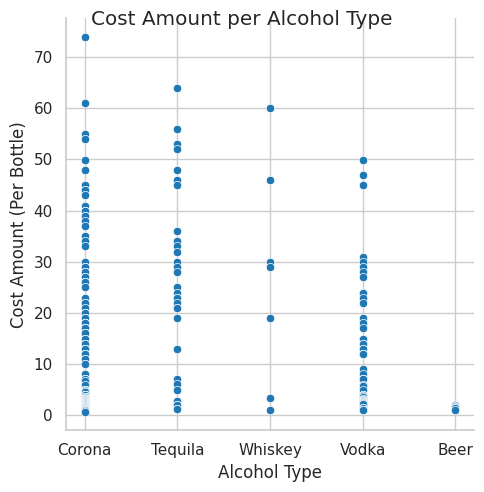

In [ ]:
#graphed Alcohol types in relation to the cost amount (per bottle)
sns.relplot(x = "Category", y = "Cost Amount (Per Bottle)", data = High_volume_store_sorted, kind = "scatter")
plt.suptitle("Cost Amount per Alcohol Type")
plt.xlabel("Alcohol Type")
plt.show()

In [ ]:
#Average cost amount per bottle
High_volume_store["Cost Amount (Per Bottle)"].mean()

np.float64(10.09272450002)

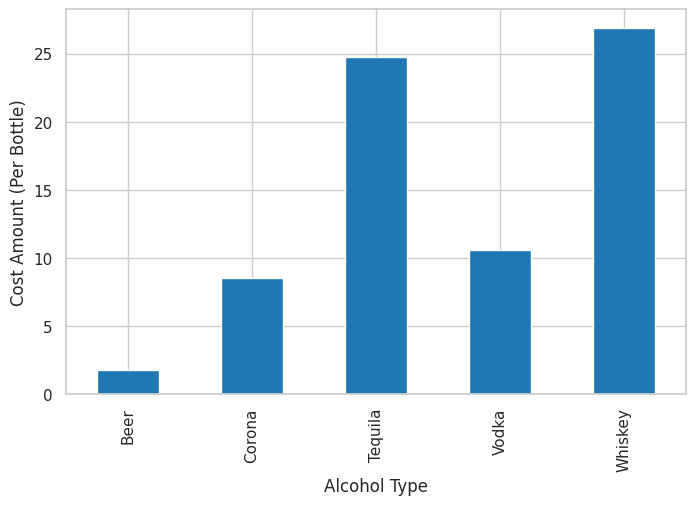

In [ ]:
plt.figure(figsize = (8,5))
High_volume_store_sorted.groupby("Category")["Cost Amount (Per Bottle)"].mean().plot(kind = "bar")
sns.set_context('notebook')
sns.set_style("whitegrid")
plt.grid(True)
plt.xlabel("Alcohol Type")
plt.ylabel("Cost Amount (Per Bottle)")
plt.show()

In [ ]:
#Finding the average seasonal alcohol sales
melted_df.groupby("Season")["Sales"].mean()

,Sales
Season,
Fall,99.370000
Spring,89.923333
Summer,100.381333
Winter,86.660667


In [ ]:
High_volume_store.columns

Index(['ItemID', 'Description', 'Bottles Per Case', 'Cost Amount (Per Bottle)',
       'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec', 'Full Year', 'Category'],
      dtype='object')

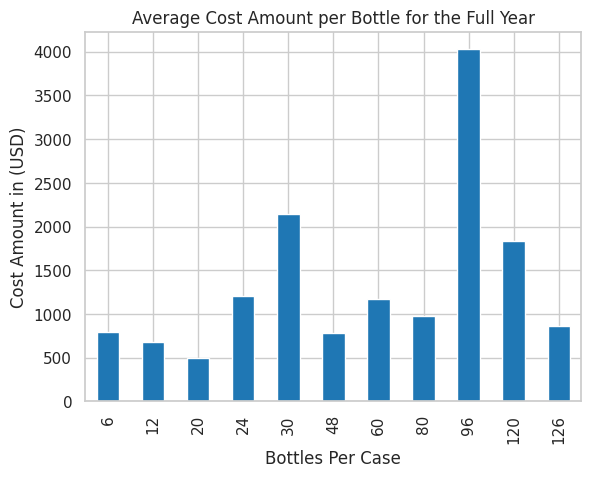

In [ ]:
#Trying to find the yearly average bottles per case
sns.set_style("whitegrid")
sns.set_context("notebook")
High_volume_store.groupby("Bottles Per Case")["Full Year"].mean().plot(kind = "bar")
plt.title("Average Cost Amount per Bottle for the Full Year")
plt.xlabel("Bottles Per Case")
plt.ylabel("Cost Amount in (USD)")
plt.show()

In [ ]:
High_volume_store['Sales'] = High_volume_store['Full Year'] > High_volume_store['Full Year'].median()

<Axes: xlabel='Cost Amount (Per Bottle)', ylabel='Sales'>

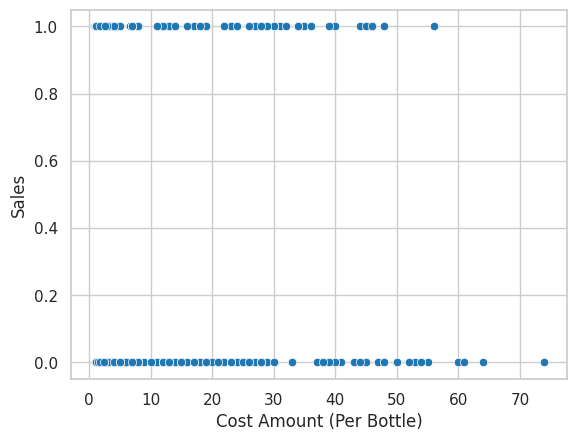

In [ ]:
sns.scatterplot(x = "Cost Amount (Per Bottle)", y = "Sales", data = High_volume_store)

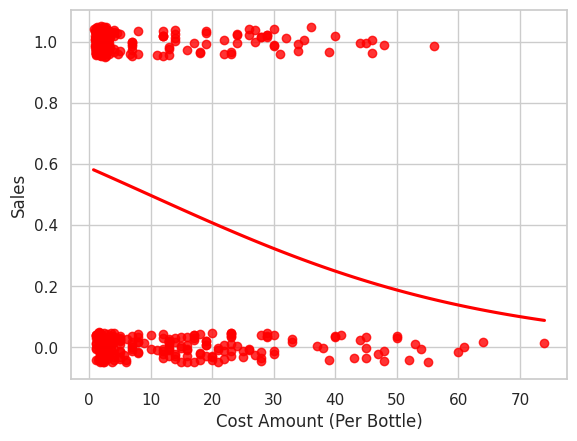

   Cost Amount (Per Bottle)  Sales Amount  High Sale
0                        10           100      False
1                        20           200      False
2                        30           150      False
3                        15           120      False
4                        25           300       True
5                        35           500       True
6                        40           400       True


In [ ]:
sns.regplot(x = 'Cost Amount (Per Bottle)',
            y = 'Sales',
            y_jitter = 0.05,
            data = High_volume_store,
            color = 'red',
            logistic = True,
            ci = None)
plt.show()

df = pd.DataFrame({
    'Cost Amount (Per Bottle)': [10, 20, 30, 15, 25, 35, 40],
    'Sales Amount': [100, 200, 150, 120, 300, 500, 400]
})

# Calculate average sales amount
average_sales = df['Sales Amount'].mean()

df['High Sale'] = (df['Sales Amount'] > average_sales)

print(df)

<Axes: xlabel='Bottles Per Case', ylabel='Sales'>

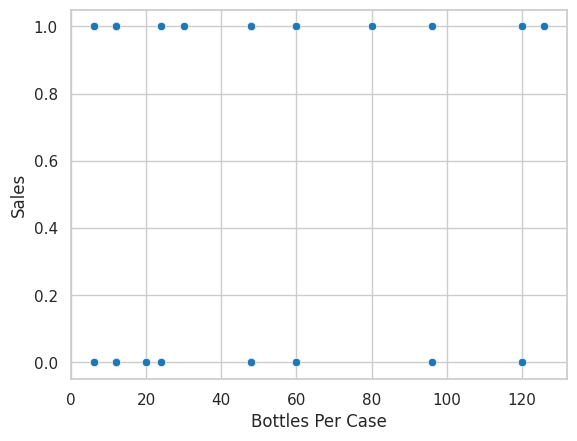

In [ ]:
sns.scatterplot(y = "Sales", x = "Bottles Per Case", data = High_volume_store)

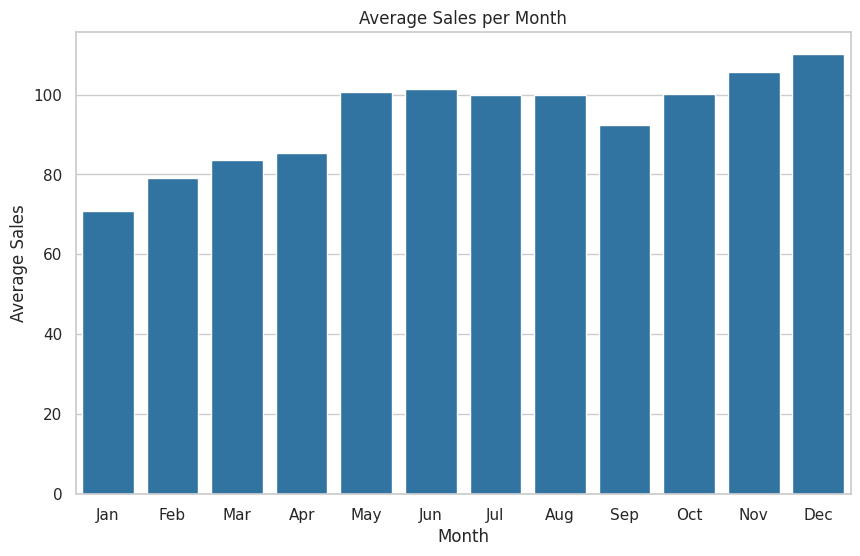

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_sales = High_volume_store[months].mean()  # Average sales per month

# Create a bar plot to visualize monthly sales
plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=month_sales)
plt.title('Average Sales per Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

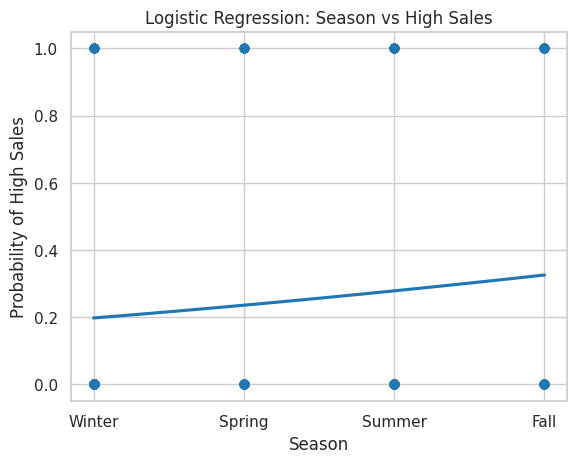

In [ ]:
def get_season(month):
    if month in ['Sep', 'Oct', 'Nov']:
        return 'Fall'
    elif month in ['Dec', 'Jan', 'Feb']:
        return 'Winter'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Spring'
    else:
        return 'Summer'

# Here I am using 'months' to represent the month names in your dataset (e.g., 'Jan', 'Feb', 'Mar', etc.)
High_volume_store['Season'] = High_volume_store[months].apply(lambda row: get_season(row.idxmax()), axis=1)

# Created a numeric mapping for seasons as this is a Binomial regression have to label the seasons with numbers
season_map = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Fall': 3}

#made the season column into a number value
High_volume_store['Season_numeric'] = High_volume_store['Season'].map(season_map)

#making a binary column for 'High Sales'
High_volume_store['High Sales'] = (High_volume_store['Full Year'] > High_volume_store['Full Year'].mean())

# Logistic regression: I am answering: Are high sales more likely in certain seasons?
sns.regplot(x='Season_numeric',
            y='High Sales',
            data=High_volume_store,
            logistic=True,
            ci=None)

plt.title('Logistic Regression: Season vs High Sales')
plt.xlabel('Season')
plt.ylabel('Probability of High Sales')
plt.xticks([0, 1, 2, 3], ['Winter', 'Spring', 'Summer', 'Fall'])  #Make the x-axis the season names
plt.show()

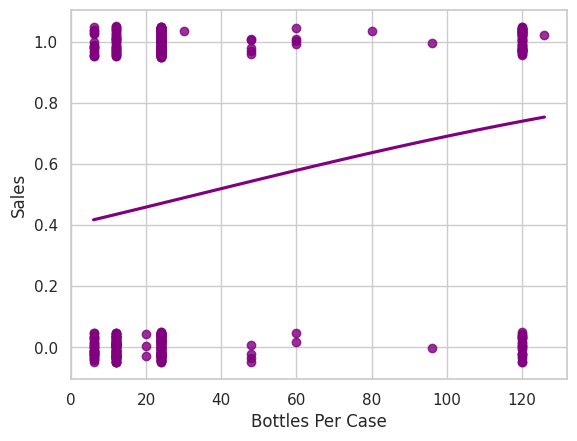

In [ ]:
sns.regplot(y = 'Sales',
            x = 'Bottles Per Case',
            y_jitter = 0.05,
            data = High_volume_store,
            logistic = True,
            color = 'purple',
            ci = None)
plt.show()

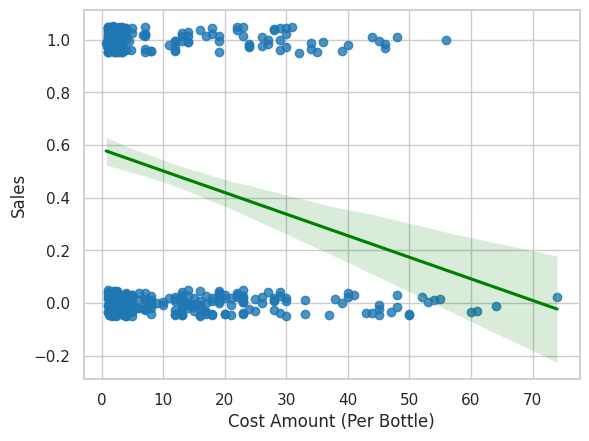

In [ ]:
sns.regplot(x = 'Cost Amount (Per Bottle)',
            y = 'Sales',
            y_jitter = 0.05,
            data = High_volume_store,
            fit_reg = True,
            line_kws = {'color':'green',
                        'label':'LM fit'})
plt.show()

<Axes: xlabel='Season', ylabel='Sales'>

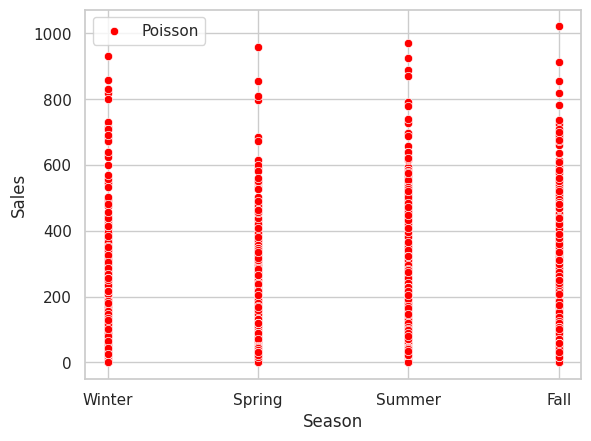

In [ ]:
sns.scatterplot(x = 'Season',
                y = 'Sales',
                data = melted_df,
                color = 'red',
                label = 'Poisson')

In [ ]:
model = smf.glm('Q("Full Year") ~ Q("Bottles Per Case")',
                data=High_volume_store,
                family=sm.families.Poisson()).fit()
print(model.conf_int(alpha = 0.05))

                              0         1
Intercept              6.762672  6.770174
Q("Bottles Per Case")  0.006540  0.006658


For the above cell, seems like the Intercept is just the baseline log-count(logarithm of the expected count for the outcome variable) when all predictors are zero (though zero “Bottles Per Case-the independent variable btw” might not be realistic, it’s just the mathematical baseline). Exponentiating this number would give you the baseline predicted count.

 "Q("Bottles Per Case") (roughly 0.00654 to 0.006658)" is the coefficient as you know but it seems to mean that each additional bottle per case is associated with about a 0.66% increase in the expected “Full Year” count (all else being equal)(I got that by exponentiating each value(which just means raising the constant e to the power of the number your expoentiating)). 0 and 1 just reppresent lower and upper bound respectivily.

In [ ]:
model = smf.glm('Q("Season_numeric") ~ Q("High Sales")',
                data=High_volume_store,
                family=sm.families.Poisson()).fit()
print(model.conf_int(alpha = 0.05))

                                0         1
Intercept                0.169257  0.347620
Q("High Sales")[T.True]  0.036165  0.365194


The intercept means around the same thing here and you can follow the steps of the other text cell to interpret the "high sales" which seems to be the independent variable.

> Add blockquote



In [ ]:
model = smf.glm('Q("Bottles Per Case") ~ Q("Category")',
                data=High_volume_store,
                family=sm.families.Poisson()).fit()
print(model.conf_int(alpha = 0.05))

                                 0         1
Intercept                 3.365717  3.565755
Q("Category")[T.Corona]  -0.059976  0.143117
Q("Category")[T.Tequila] -0.266159 -0.029681
Q("Category")[T.Vodka]    0.227670  0.439314
Q("Category")[T.Whiskey]  0.161747  0.462131


The catagories are independent variables and the intercept means the same thing. Something I'll note here though is that these are all ranges. So for the first text cell I averaged it out but really it should be a range of values that you exponentiating. For example, the intercept can be interpreted as a range for the actual count scale that goes from 28.9 to 35.4.

In [ ]:
model = smf.glm('Q("Cost Amount (Per Bottle)") ~ Q("Full Year")',
                data=High_volume_store,
                family=sm.families.Poisson()).fit()

print(model.conf_int(alpha = 0.05))

                       0         1
Intercept       2.678758  2.769385
Q("Full Year") -0.000493 -0.000402


In [ ]:
The same thing, full year is independent.

SyntaxError: invalid syntax (<ipython-input-128-e65ca75584ee>, line 1)